<a href="https://colab.research.google.com/github/Distortedlogic/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Jeremy_Meek_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
NAMES=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:
df = pd.read_csv(URL, header=None, names=NAMES).replace({'?':np.NaN, 'n':0, 'y':1})
assert df.shape[0] == 435

In [0]:
def conf_int(data, confidence=0.95):
  '''
  Calculates the mean, margin of error, and confidence interval of a dataset

  returns the mean, margin of error, and confidence interval
  '''
  data = np.array(data)
  data = data[~np.isnan(data)]

  mean, n = np.mean(data), len(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)

  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)

  return mean, margin_of_error, (mean - margin_of_error, mean + margin_of_error)

def conf_int_df(dataframe, confidence=0.95):
  '''
  Calculates the mean and margin of error for each column of a dataframe.

  Returns means and errors in two separate list.
  '''
  features = list(dataframe)[1:]

  means = []
  errors = []
  for feature in features:
    mu, moe, _ = conf_int(dataframe[feature], confidence)

    means.append(mu)
    errors.append(moe)

  return means, errors

def plot_conf_int_df(dataframe, confidence=0.95, party='all'):
  '''
  Plots a barchart of yes votes with confidence interval for each issue.

  Set party parameter to filter by party

  Notes:
  The xtick labels are not completely properly aligned with the bars
  I was unable to easily fix this
  '''

  party_colors = {
      'all':'purple',
      'democrat':'blue',
      'republican':'red'
  }

  if party != 'all':
    dataframe = dataframe[dataframe['party']==party]

  features = list(dataframe)[1:]

  means, errors = conf_int_df(dataframe, confidence)
  num_x = len(means)

  fig, ax = plt.subplots()

  ax.bar(np.linspace(0, num_x, num_x), means, yerr=errors, color=party_colors[party])
  ax.axhline(y=0.5, color='black', linestyle='-')
  ax.set_title(f'Which bills are favored by {party}?')

  ax.set_xticks(np.arange(num_x))
  ax.set_xticklabels(features)

  ax.set_ylabel("percentage voting 'yes'")
  ax.yaxis.grid(True)

  plt.xticks(rotation=90)
  plt.show()

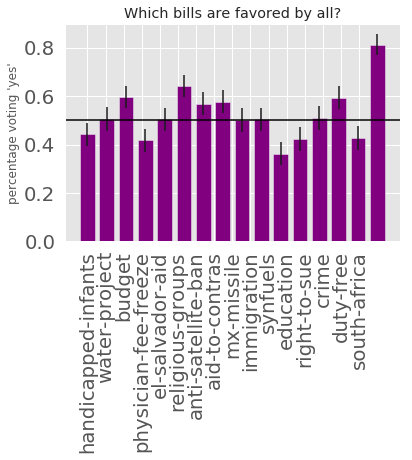

In [113]:
plot_conf_int_df(df)

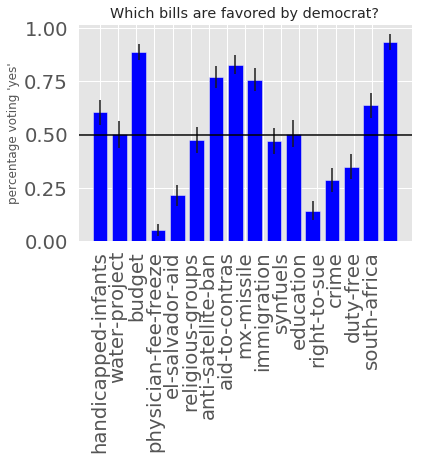

In [114]:
plot_conf_int_df(df, party='democrat')

We can say with 95% confidence that the average support for the budget bill is in (0.5498151808536169, 0.6435810455614774)

In [0]:
adults = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [36]:
contingency_table = pd.crosstab(adults['sex'], adults['workclass'], margins=True)

contingency_table

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
sex,,,,,,,,,
Female,315,835,2,7752,135,399,489,5,9932
Male,645,1258,5,14944,981,2142,809,9,20793
All,960,2093,7,22696,1116,2541,1298,14,30725


In [0]:
def plot_contingency_table(dataframe, feature1, feature2, bins1=0, bins2=0, normalize='columns'):
  '''
  Plots a contingency table of one feature vs another

  Arguments:
  - bins allows you to convert continuous data into discrete data
  - normalize defaults to columns as to scale the plot to visualize all the data

  Notes:
  - bins functionality is not completed and Im running low on time
  - I implemented normalize for when not all data is visible on plot due to relative size differences
  '''

  #Replacing the column needs to be changed to avoid re-manipulating manipulated data
  if bins1!=0:
    dataframe[feature1] = pd.cut(dataframe[feature1], bins1)
  if bins2!=0:
    dataframe[feature2] = pd.cut(dataframe[feature2], bins2)

  contingency_table = pd.crosstab(dataframe[feature1], dataframe[feature2], normalize=normalize)

  fig = plt.figure(figsize=(10, 5))
  sns.set(font_scale=1.8)
  categories = list(contingency_table.columns)

  for i in range(len(contingency_table)):
    bottom = sum(contingency_table.iloc[j].values for j in range(i)) #stacks bars
    p1 = plt.bar(categories, contingency_table.iloc[i].values, 0.55, bottom=bottom, label=contingency_table.index[i])
  
  plt.legend(bbox_to_anchor=(1, 1.1), title=feature1)

  plt.xticks(rotation=90)
  plt.xlabel(feature2)
  plt.ylabel('Percentage')

  plt.show()

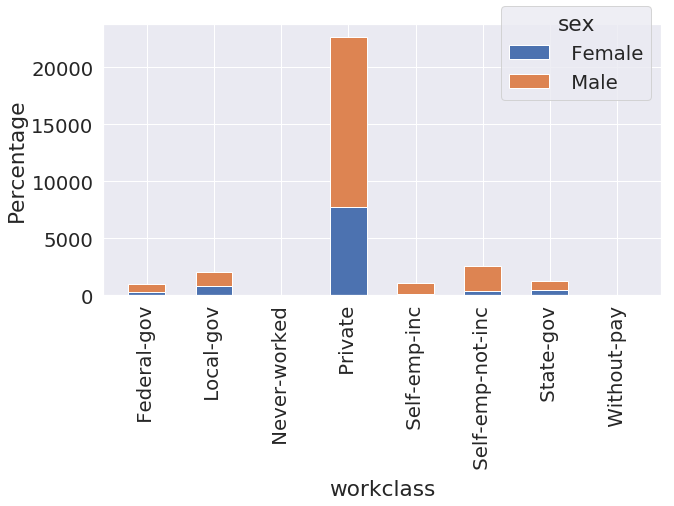

In [151]:
#without Normalizing
plot_contingency_table(adults, 'sex', 'workclass', normalize=False)

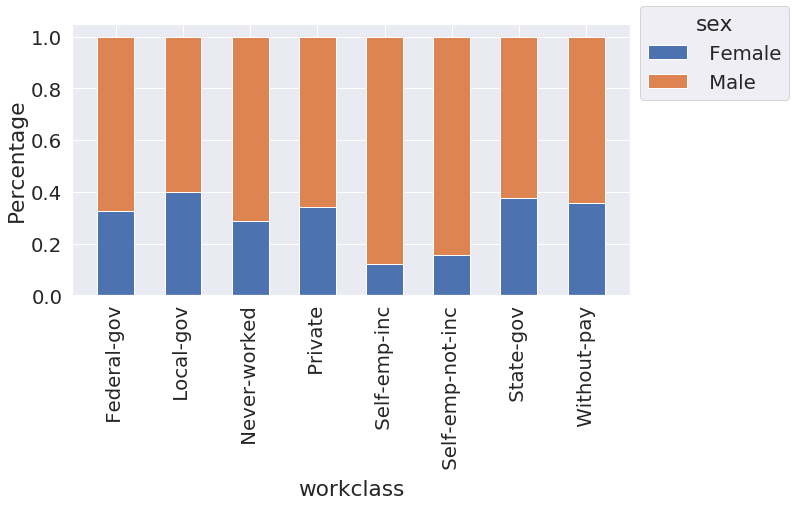

In [152]:
#with normalizing
plot_contingency_table(adults, 'sex', 'workclass')

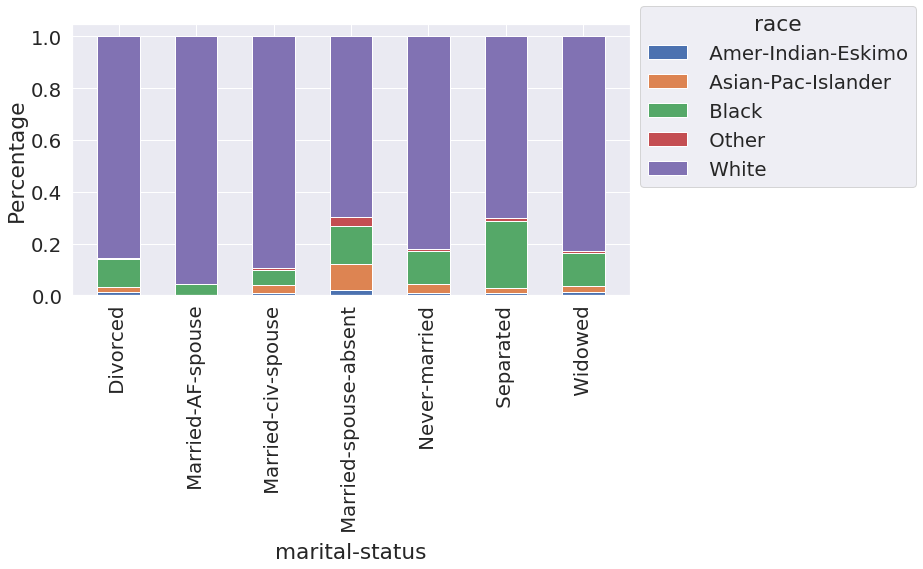

In [153]:
#testing a different feature combination
plot_contingency_table(adults, 'race', 'marital-status')

In [140]:
#fixing bins functionality would be done with more time
plot_contingency_table(adults, 'sex', 'hours-per-week', bins2=[0, 9, 19, 29, 39, 49, 1000])

TypeError: ignored

In [56]:
#didnt have enough time to expand on this section
observed = pd.crosstab(adults['sex'], adults['workclass'])
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 636.4799145064011
P-value: 3.379617448830285e-133
Degrees of Freedom: 7
Expected: 
 [[3.10324491e+02 6.76572042e+02 2.26278275e+00 7.33658819e+03
  3.60752221e+02 8.21390138e+02 4.19584573e+02 4.52556550e+00]
 [6.49675509e+02 1.41642796e+03 4.73721725e+00 1.53594118e+04
  7.55247779e+02 1.71960986e+03 8.78415427e+02 9.47443450e+00]]


Null Hypothesis: Work class is independent of sex.

Due to a p-value of $3.379617448830285*10^{-133}\approx 0$, we REJECT the null hypothesis that work class and sex are independent, and conclude that there is an association between work class and sex.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)